# Analisis Data Online Retail

## 1. Data Preparation

In [64]:
# 1.1 Import Library

import pandas as pd
import matplotlib.pyplot as plt


In [65]:
# 1.2 Load Data file

Df = pd.read_excel('Online Retail.xlsx', sheet_name='Online Retail')
Df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [66]:
Df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

## 2. Data Cleaning

In [67]:
# 2.1 Dimensionality of the DataFrame

Df.shape


(541909, 8)

In [68]:
# 2.2 Missing Values

Df.isnull().sum()


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [69]:
# 2.2.1 Cleaning missing value

Df_Clean = Df.dropna(axis=0, subset=['Description','CustomerID'])


In [70]:
# 2.3 Missing Values

Df_Clean.isnull().sum()


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [71]:
# 2.3.1 Dimensionality of the DataFrame

Df_Clean.shape


(406829, 8)

Dari data transaksi online retail. didapat memiliki 541909 baris dan 8 kolom. sebelum melakukan perbersihan data, ditemukan data kosong di kolom Description sebanyak 1454 dan kolom CustomerID sebanyak 135080 dan setelah dilakukan pembersihan baris terjadi pengurangan jumlah baris menjadi 406829 baris dan 8 kolom.

## 3. Analisis descriptive

In [72]:
# 3.1 summary descriptive statistics

Desc = Df_Clean.describe().transpose()
Desc['Type'] = Df_Clean.dtypes
Desc


,count,mean,std,min,25%,50%,75%,max,Type
Quantity,406829.0,12.061303,248.693370,-80995.0,2.00,5.00,12.00,80995.0,int64
UnitPrice,406829.0,3.460471,69.315162,0.0,1.25,1.95,3.75,38970.0,float64
CustomerID,406829.0,15287.690570,1713.600303,12346.0,13953.00,15152.00,16791.00,18287.0,float64


Dari kesimpulan diatas terdapat nilai minus sebanyak 80995 untuk jumlah transaksi dan jumlah transaksi tertinggi sebesar 80995 

In [73]:
# 3.1.1 Descriptive Statistics Colums InvoiceDate

Desc_InvoiceDate = pd.DataFrame(Df_Clean['InvoiceDate'].describe())
Desc_InvoiceDate

C:\Users\62858\AppData\Local\Temp\ipykernel_6080\1777776287.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  Desc_InvoiceDate = pd.DataFrame(Df_Clean['InvoiceDate'].describe())


,InvoiceDate
count,406829
unique,20460
top,2011-11-14 15:27:00
freq,543
first,2010-12-01 08:26:00
last,2011-12-09 12:50:00


Diketahui dari Data transaksi online retail yang dimulai dari tanggal 1 Desember 2010 sampai 9 Desember 2011 dengan jumlah transaksi sebanyak 406829. terdapat jumlah transaksi tertinggi dalam satu hari pada tanggal 14 November 2011 sebanyak 543 transaksi.

In [74]:
# 3.1.2 Descriptive Statistics Colums Description

Desc_Description = pd.DataFrame(Df_Clean['Description'].describe())
Desc_Description


,Description
count,406829
unique,3896
top,WHITE HANGING HEART T-LIGHT HOLDER
freq,2070


Diketahui dari data description terdapat 3896 item produk dan didapat bahwa item yang paling banyak dipesan adalah :
- item WHITE HANGING HEART T-LIGHT HOLDER sebanyak 2070

In [75]:
# 3.1.3 Descriptive Statistics Colums Country

pd.DataFrame(Df_Clean['Country'].describe())


,Country
count,406829
unique,37
top,United Kingdom
freq,361878


Diketahui dari kolom negara terdapat 37 Negara dan didapat bahwa negara yang paling banyak melakukan transaksi adalah :
- Unitted Kingdom sebanyak 361878 transaksi

## 4. Qunatity Distribution

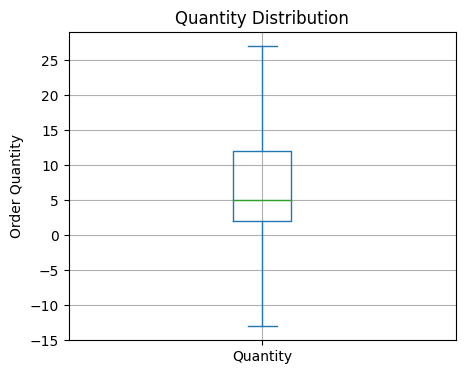

In [76]:
# 4.1 Box Plot Quantity Distribution

Ax = Df_Clean['Quantity'].plot.box(
    showfliers=False,
    grid=True,
    figsize=(5, 4)
)

Ax.set_ylabel('Order Quantity')
Ax.set_title('Quantity Distribution')

plt.suptitle("")
plt.show()


Dari grafik diatas dapat disimpulkan bahwa banyaknya transaksi berulang (repeat order) di angka 1 - 12 dan terdapat nilai minus lebih dari 10.

In [77]:
# 4.1.1 Successful transaction

Transaksi_Berhasil = (Df_Clean.loc[Df['Quantity'] > 0].shape)
display(Transaksi_Berhasil)


(397924, 8)

In [78]:
# 4.1.2 Failed transaction

Transaksi_Gagal = (Df_Clean.loc[Df['Quantity'] < 0].shape)
display(Transaksi_Gagal)

(8905, 8)

- Dari jangka waktu selama 375 Hari (2010-12-01 s/d 2011-12-09)
- Untuk transaksi yang berhasil sebanyak 397924.
- Untuk transaksi yang gagal sebanyak 8905.

## 5. Times Series Number Of Orders

In [79]:
# 5.1 Monthly transactions

Transaksi_perbulan = Df_Clean.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()
print(Transaksi_perbulan)


InvoiceDate
2010-12-31    1708
2011-01-31    1236
2011-02-28    1202
2011-03-31    1619
2011-04-30    1384
2011-05-31    1849
2011-06-30    1707
2011-07-31    1593
2011-08-31    1544
2011-09-30    2078
2011-10-31    2263
2011-11-30    3086
2011-12-31     921
Freq: M, Name: InvoiceNo, dtype: int64


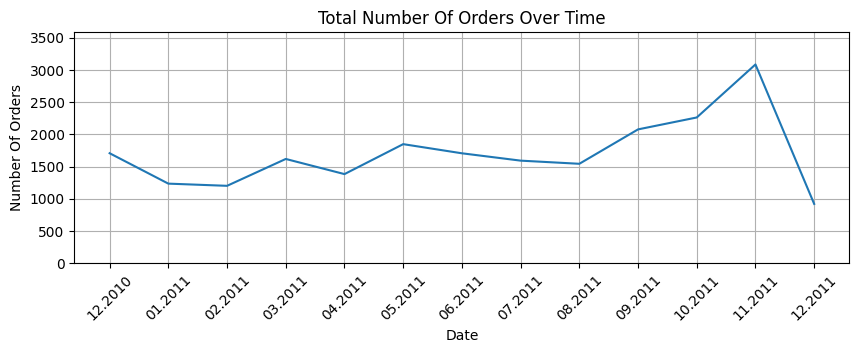

In [82]:
# 5.2 Graphs Monthly transactions

Ax = pd.DataFrame(Transaksi_perbulan.values).plot(
    grid=True,
    figsize=(10,3),
    legend=False
)

Ax.set_xlabel('Date')
Ax.set_ylabel('Number Of Orders')
Ax.set_title('Total Number Of Orders Over Time')

Ax.set_ylim([0, max(Transaksi_perbulan.values)+500])

plt.xticks(
    range(len(Transaksi_perbulan.index)), 
    [x.strftime('%m.%Y') for x in Transaksi_perbulan.index], 
    rotation=45
)

plt.show()


Dari grafik times series diatas menunjukkan adanya penurunan jumlah order pada bulan Desember dikarenakan pada bulan tersebut hanya 9 hari melakukan order.

## 6. Times Series Revenue

In [83]:
# 6.1 Monthly Revenue

Df_Clean['Sales'] = Df_Clean['Quantity'] * Df_Clean['UnitPrice']
Df_Clean.head()


C:\Users\62858\AppData\Local\Temp\ipykernel_6080\3118186989.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df_Clean['Sales'] = Df_Clean['Quantity'] * Df_Clean['UnitPrice']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [84]:
# 6.2 monthly sales revenue

Pendapatan_perbulan = Df_Clean.set_index('InvoiceDate')['Sales'].resample('M').sum()
Pendapatan_perbulan


InvoiceDate
2010-12-31     554604.020
2011-01-31     475074.380
2011-02-28     436546.150
2011-03-31     579964.610
2011-04-30     426047.851
2011-05-31     648251.080
2011-06-30     608013.160
2011-07-31     574238.481
2011-08-31     616368.000
2011-09-30     931440.372
2011-10-31     974603.590
2011-11-30    1132407.740
2011-12-31     342506.380
Freq: M, Name: Sales, dtype: float64

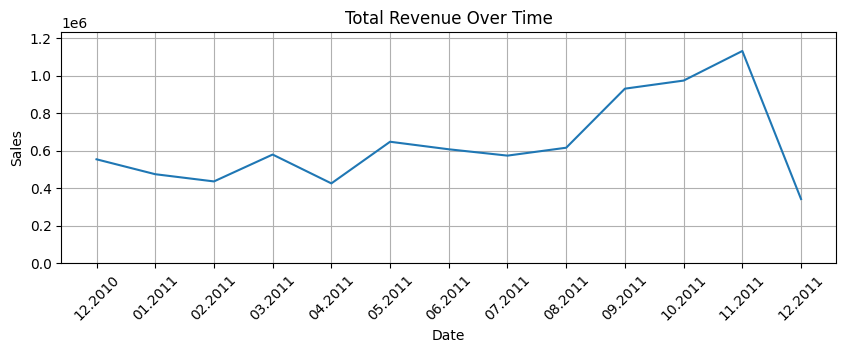

In [86]:
# 6.3 Graphs Monthly sales revenue

Ax = pd.DataFrame(Pendapatan_perbulan.values).plot(
    grid=True,
    figsize=(10,3),
    legend=False
)

Ax.set_xlabel('Date')
Ax.set_ylabel('Sales')
Ax.set_title('Total Revenue Over Time')

Ax.set_ylim([0, max(Pendapatan_perbulan.values)+100000])

plt.xticks(
    range(len(Pendapatan_perbulan.index)), 
    [x.strftime('%m.%Y') for x in Pendapatan_perbulan.index], 
    rotation=45
)

plt.show()